<a href="https://colab.research.google.com/github/TanviKandalla/SRISHTI_2023/blob/main/Copy_of_DataFeatures%26Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SRISHTI'23 Tutorial 02<br>
Module Coordinator : amit.pandey@research.iiit.ac.in <br>

### The aim of this lab is to introduce DATA and FEATURES.
We will study: Feature extraction and Data Augmentation.
Let's get started.



Make a copy before running the cells

### Data can be anything like text, image , sound signals, and even a mix of multiple types (multimodal). We need to learn how to handle raw data, and how to use them for our analysis.

# Extracting features from data


 



## What are features? 
### Features are individual independent variables that act like an input to your system. 
A very basic example is: In z = x + y, x and y are the features.
We can have simple features like above or even more complex features learned by our machine learning models (we will study these later on).

# Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [2]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

Let us visualize a few images here:

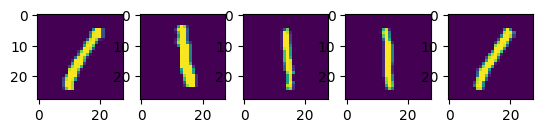

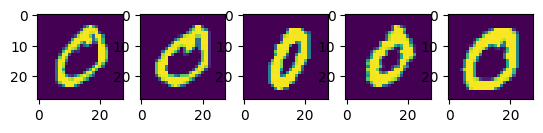

In [3]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [4]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [5]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

## We can even use value of each pixel as a feature. But let us see how to derive other features.

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [6]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [7]:
sum1.shape

(6742,)

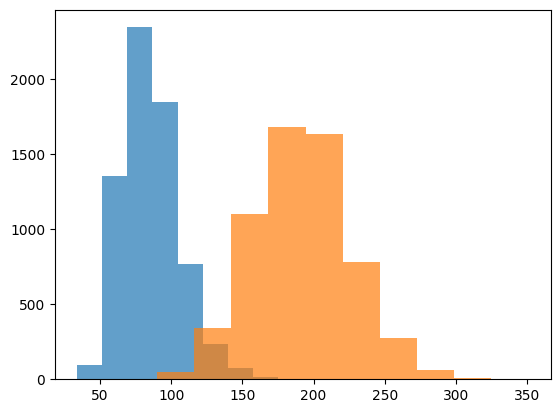

In [8]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);



We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [9]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

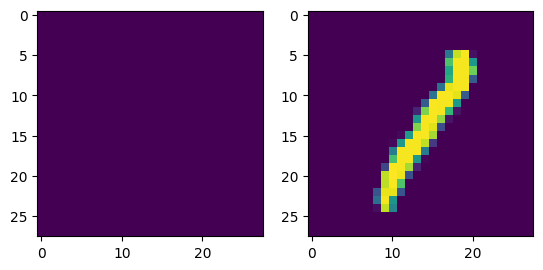

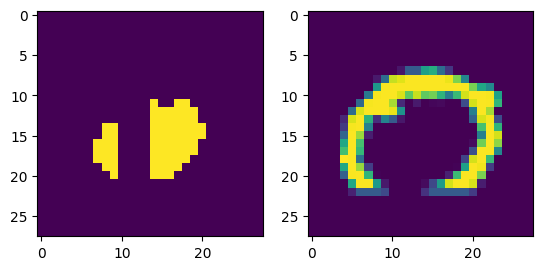

In [10]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

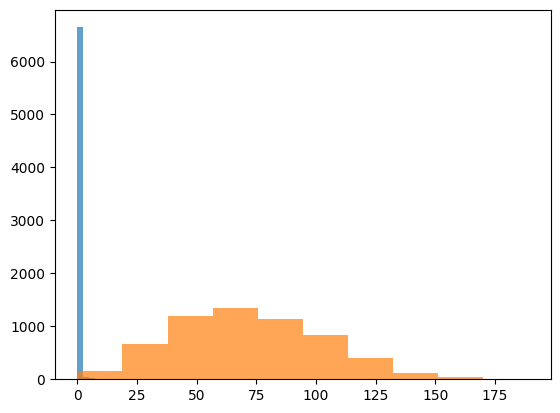

In [11]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [12]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

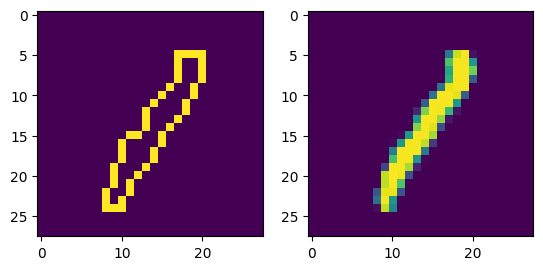

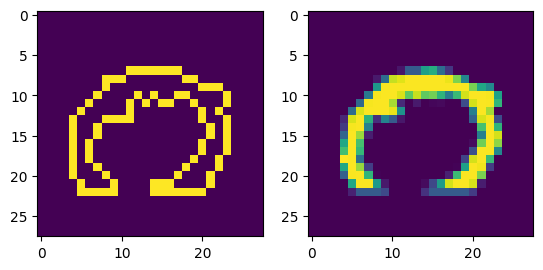

In [13]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

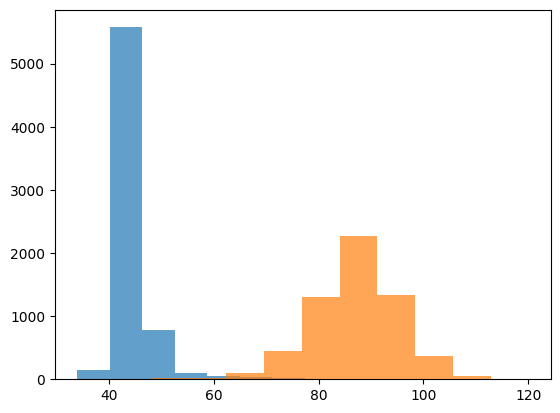

In [14]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

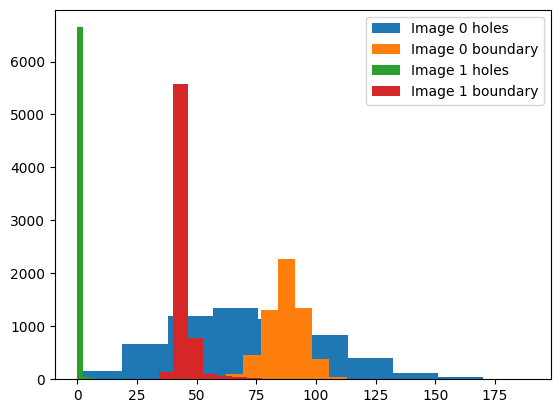

In [22]:
#hole1, hole0, bound1, bound0 need to be compared
img0 = [hole0,bound0]
img1 = [hole1,bound1]

plt.hist(img0[0], label='Image 0 holes')
plt.hist(img0[1], label='Image 0 boundary')
plt.hist(img1[0], label='Image 1 holes')
plt.hist(img1[1], label='Image 1 boundary')
plt.legend()
plt.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1. From the comparisons below, it seems like summing up the hole pixels and boundary pixels is a good combination of features to use

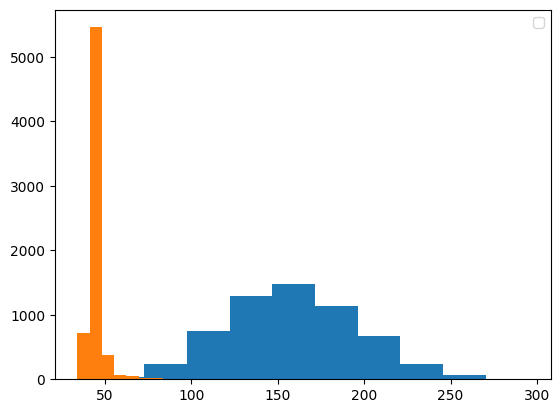

In [25]:
#we can plot the sum of the features together
img0 = [hole0,bound0]
img1 = [hole1,bound1]

plt.hist(img0[0]+img0[1])
plt.hist(img1[0]+img1[1])
plt.legend()
plt.show()
#clearly, this works even better

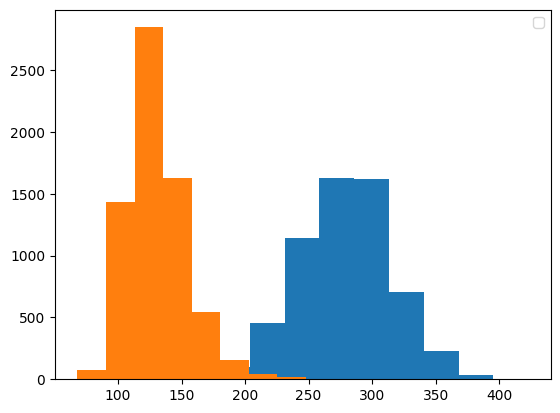

In [26]:
#we can plot the sum of the features together
img0 = [sum0,bound0]
img1 = [sum1,bound1]

plt.hist(img0[0]+img0[1])
plt.hist(img1[0]+img1[1])
plt.legend()
plt.show()
#clearly, this works even better

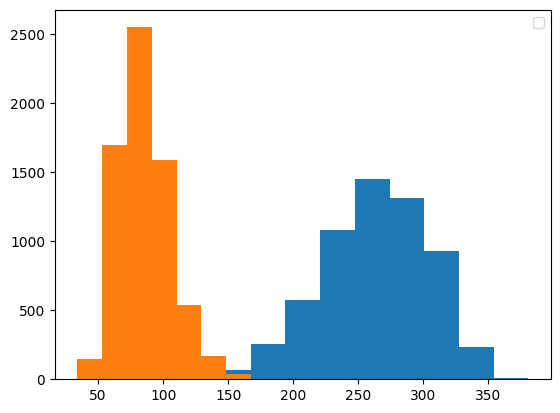

In [27]:
#we can plot the sum of the features together
img0 = [hole0,sum0]
img1 = [hole1,sum1]

plt.hist(img0[0]+img0[1])
plt.hist(img1[0]+img1[1])
plt.legend()
plt.show()
#clearly, this works even better

2. How would you test or visualize four or more features?

You could use a heatmap if you wanted to compare how similar the features are or how useful they are compared to the required output in case of labelled data. You could also visualise them using bar graphs like I did earlier in case you want to check which combination seems to divide classes better

3. Can you come up with your own features?

We could use features related to the area occupied by the non-black pixels

4. Will these features work for classes other than 0 or 1?

Yes, they might work. Though it depends on the exact classes you use. Some classes may have very similar values for a certain feature, so you would have to select the correct one.

5. What happens if we were to take more than two classes at the same time?

Again, it would depend on the overlap between the features. If the classes were different enough, we could just use multi-class classification algorithms based on the same features

## Features from CSV file

In [29]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [30]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [31]:
df.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [32]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})


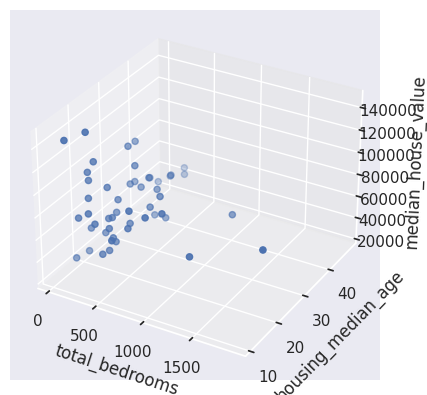

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['total_bedrooms'][:50]
y = df['housing_median_age'][:50]
z = df['median_house_value'][:50]

ax.set_xlabel("total_bedrooms")
ax.set_ylabel("housing_median_age")
ax.set_zlabel("median_house_value")

ax.scatter(x, y, z)

plt.show()

In [ ]:
## Task :
## Download a CSV file from the internet, upload it to your google drive.
## Read the CSV file and plot graphs using different combination of features and write your analysis
## Ex : IRIS flower datasaet

In [35]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
iris = pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [37]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


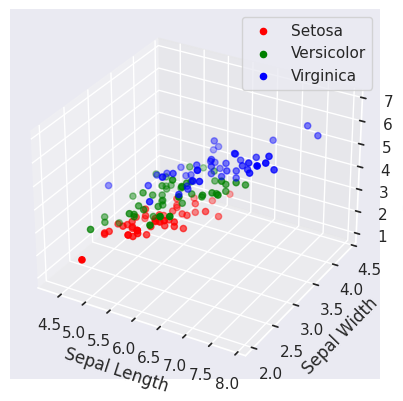

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Separate data for each species
setosa = iris[iris['Species'] == 'Iris-setosa']
versicolor = iris[iris['Species'] == 'Iris-versicolor']
virginica = iris[iris['Species'] == 'Iris-virginica']

# Plot each species with a different color
ax.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], setosa['PetalLengthCm'], c='red', label='Setosa')
ax.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], versicolor['PetalLengthCm'], c='green', label='Versicolor')
ax.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], virginica['PetalLengthCm'], c='blue', label='Virginica')

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend()

plt.show()

## Augmentation
It is a technique to increase the diversity of our training set by applying random (but realistic) transformations, such as image rotation, change of color etc. When we have limited training data, we can augment our data with help of these techniques.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

For this lab we will use a subset of MNIST that is very small, to better understand the effect of augmentation.

In [45]:
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

print("original data size:",train_X.shape)


original data size: (60000, 28, 28)


In [46]:
print(train_X[0].shape,train_y[0])

(28, 28) 5


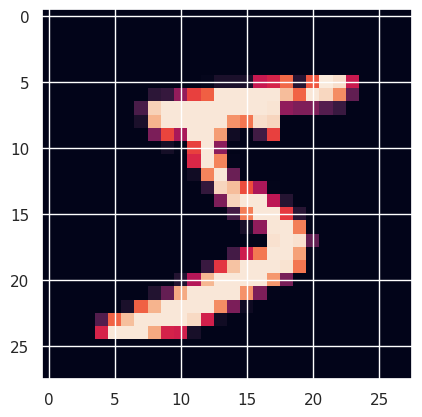

In [47]:
plt.imshow(train_X[0])

In [48]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

print("Now it is:", train_X.shape)

Now it is: (50, 28, 28)


Augmentation 1: rotation
Let us try rotating the image a little. We will use skimage library for this.

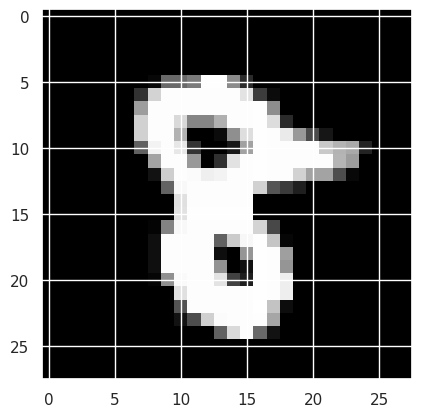

(28, 28)


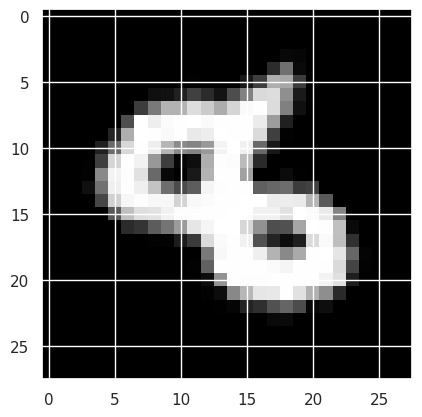

In [49]:
plt.imshow(train_X[2], cmap='gray')
plt.show()
print(train_X[2].shape)
plt.imshow(rotate(train_X[2],45), cmap='gray')

After rotating, the the class of the image is still the same. Let us make a function to rotate multiple images by random angles. We want a slightly different image every time we run this function. So, we generate a random number between 0 and 1 and change it so that it lies between -constraint/2 and +constraint/2

In [50]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.

This function returns a slightly different image each time we call it. So we can increase the number of images in the sample by any multiple. 

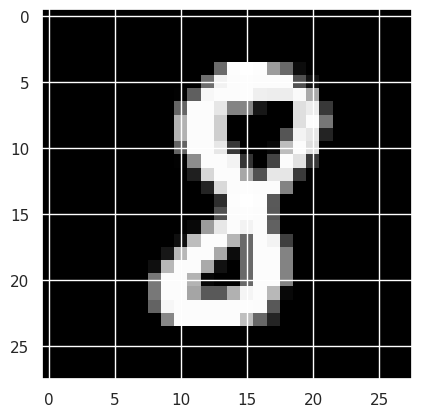

shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.77395605]
angle with constraint is: [19.1769234]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.43887844]
angle with constraint is: [-4.27850922]
shape of sample before is: (28, 28)
len(sample.shape) 2
shape of sample is: (1, 28, 28)
angle is: [0.85859792]
angle with constraint is: [25.10185439]


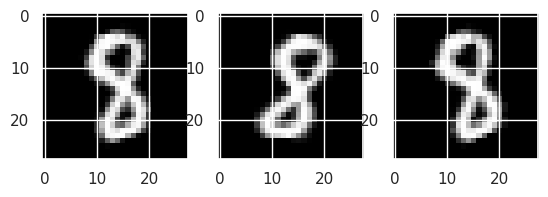

In [51]:
sample = train_X[20]
angleconstraint = 70
# show the original image
plt.imshow(sample, cmap='gray')
plt.show()
plt.subplot(1,3,1)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show an augmented image
plt.subplot(1,3,2)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # show another augmented image from the same sample
plt.subplot(1,3,3)
plt.imshow(augRotate(sample, angleconstraint), cmap='gray') # one more image from the same sample

Let us try one more augmentation, Shear: A transformation in which all points along a given line remain fixed while other points are shifted parallel to by a 
 distance proportional to their perpendicular distance from. Shearing a plane figure does not change its area. 

In [52]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

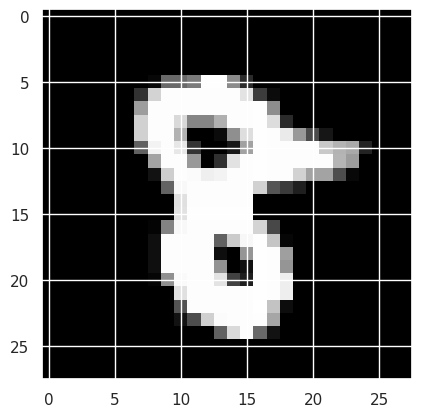

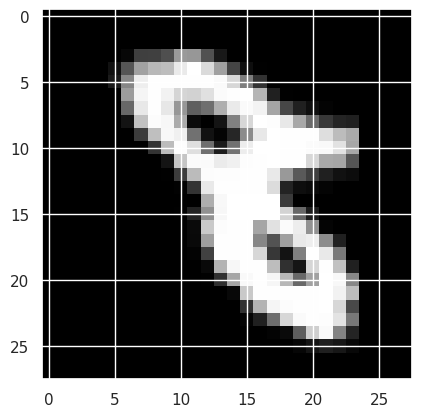

In [53]:
sample = train_X[2]
plt.imshow(sample, cmap='gray')
plt.show()

# apply shear
plt.imshow(shear(sample, 0.4), cmap='gray')

## Let us also see skeletonization of image

In [54]:
from skimage.morphology import skeletonize


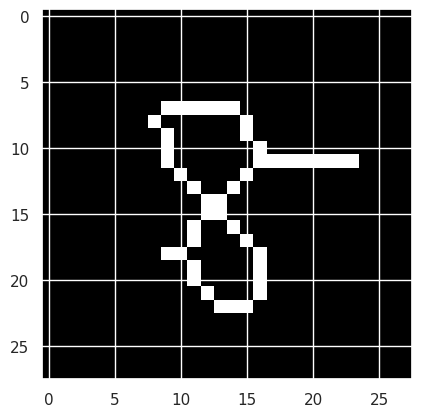

In [55]:
skeleton = skeletonize(train_X[2],method='lee')
plt.imshow(skeleton, cmap='gray')

In [56]:
#Structuring elements that are repeatedly used for thinning

S1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]]) # -1 for dont care
S2 = np.array([[-1,0,0],[1,1,0],[-1,1,-1]])


def CheckMatch(window,kernel):
  for i in range(window.shape[0]):
        for j in range(window.shape[1]):
            if kernel[i,j]!=-1 and window[i,j]!=kernel[i,j]:
                return False
  return True

def ApplyKernel(image,kernel): #used
  height, width =  image.shape
  res = np.copy(image)
  for i in range(1,height-1):
    for j in range (1,width-1):
      window = image[i-1:i+2,j-1:j+2]
      #print('window shape',window.shape)
      Match_result = CheckMatch(window,kernel)
      if (Match_result):
        res[i,j]=0
  return res



def Skeletonization(image):
  '''pass binary image'''
  #new = np.copy(image)
  #old = np.zeros(image.shape,dtype=np.uint8)
  count = 1
  change = 1000
  while (change >0.01):
    print('count',count)
    new = image
    new = ApplyKernel(new,S1)
    new = ApplyKernel(new,S2)
    new = ApplyKernel(new,np.rot90(S1,1)) #90 degree rotate
    new = ApplyKernel(new,np.rot90(S2,1))
    new = ApplyKernel(new,np.rot90(S1,2)) # 180 degree rotate
    new = ApplyKernel(new,np.rot90(S2,2))
    new = ApplyKernel(new,np.rot90(S1,3)) # 270 degree rotate
    new = ApplyKernel(new,np.rot90(S2,3))
    count+= 1
    change = np.mean(np.abs(new-image))
    image = new
    plt.imshow(new,cmap='gray')
    plt.show()
  return new

In [57]:
binarized  =( train_X[0] > 0 ).astype(np.uint8)

count 1


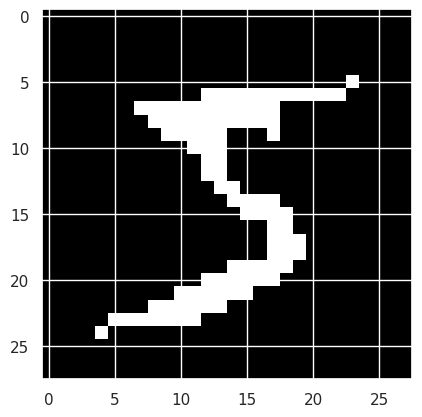

count 2


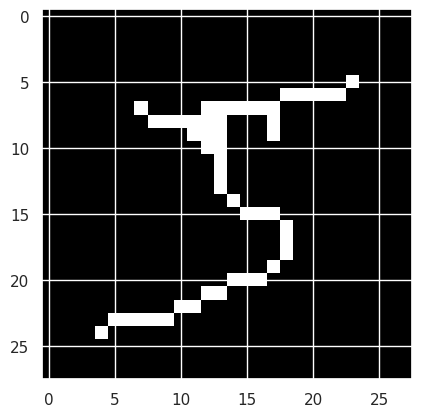

count 3


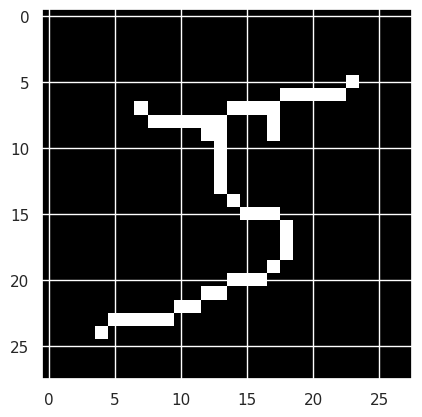

count 4


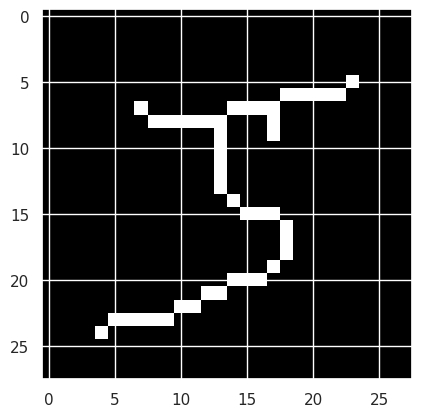

count 5


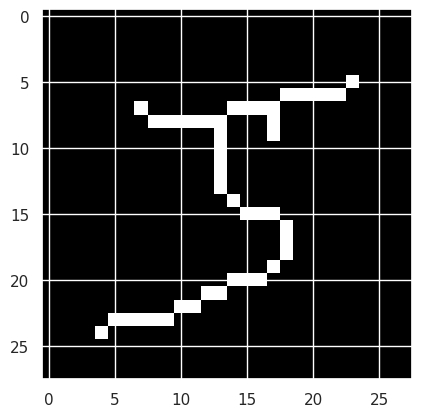

In [58]:
skeleton_five = Skeletonization(binarized)